In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import truncnorm, norm
import pandas as pd

## Q4

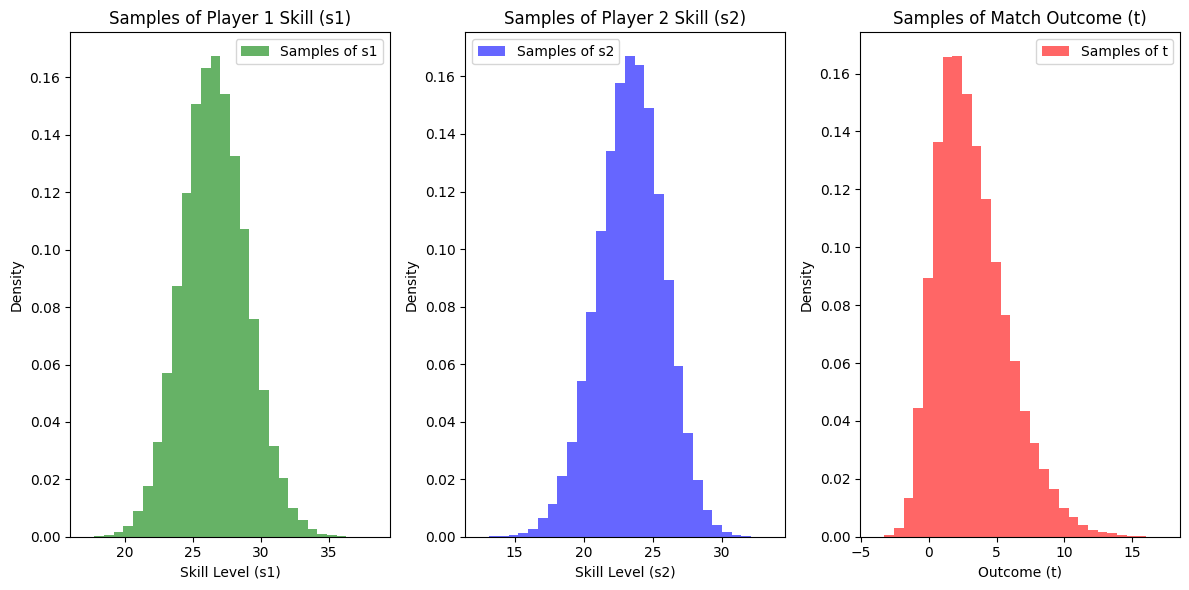

In [42]:
# Define parameters
mu_1 = 25  # Prior mean of player 1 skill
sigma_1 = np.sqrt(25/3)  # Prior std dev of player 1 skill
mu_2 = 25  # Prior mean of player 2 skill
sigma_2 = np.sqrt(25/3)  # Prior std dev of player 2 skill
sigma_t = 1  # Standard deviation of the match outcome

# Function to sample t given s1 and s2
def sample_t(s1, s2, sigma_t):
    return np.random.normal(s1 - s2, sigma_t)

# Function to sample s = [s1, s2] given t using joint normal
def sample_s_given_t(t, mu_1, mu_2, sigma_1, sigma_2):
    # Compute the conditional means and variances
    variance_s1 = sigma_1**2
    variance_s2 = sigma_2**2

    # Define A matrix and b vector
    A = np.array([[1, -1]])  # For the linear combination t = s1 - s2
    Sigma_s = np.array([[variance_s1, 0], [0, variance_s2]])  # Covariance matrix for s1 and s2
    b = np.array([t])

    # Conditional distribution of s given t
    inv_sigma_t = 1 / (sigma_t**2)  # Inverse of scalar sigma_t^2
    cov_s_given_t = np.linalg.inv(A.T @ A * inv_sigma_t + np.linalg.inv(Sigma_s))
    mean_s_given_t = cov_s_given_t @ (A.T * inv_sigma_t @ b + np.linalg.inv(Sigma_s) @ np.array([mu_1, mu_2]))

    # Draw a sample from the conditional distribution
    return np.random.multivariate_normal(mean_s_given_t, cov_s_given_t)

# Gibbs Sampling with Burn-in
def gibbs_sampling(num_samples, burn_in, initial_s1, initial_s2):
    s1_samples = [initial_s1]
    s2_samples = [initial_s2]
    t_samples = []

    # Iterate to generate samples
    for _ in range(num_samples):
        # Sample t given s1 and s2
        s1_current = s1_samples[-1]
        s2_current = s2_samples[-1]
        t_new = sample_t(s1_current, s2_current, sigma_t)
        t_samples.append(t_new)

        # Sample s = [s1, s2] given t, with rejection if s1 <= s2
        while True:
            s_new = sample_s_given_t(t_new, mu_1, mu_2, sigma_1, sigma_2)
            if s_new[0] > s_new[1]:  # Ensure s1 > s2
                s1_samples.append(s_new[0])
                s2_samples.append(s_new[1])
                break

    # Discard the burn-in samples
    return s1_samples[burn_in:], s2_samples[burn_in:], t_samples[burn_in:]

# Parameters for Gibbs sampling
num_samples = 100000
burn_in = 2000  # Number of samples to discard
initial_s1 = 26
initial_s2 = 24

# Perform Gibbs sampling
s1_samples, s2_samples, t_samples = gibbs_sampling(num_samples, burn_in, initial_s1, initial_s2)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(s1_samples, bins=30, density=True, alpha=0.6, color='g', label='Samples of s1')
plt.title('Samples of Player 1 Skill (s1)')
plt.xlabel('Skill Level (s1)')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(s2_samples, bins=30, density=True, alpha=0.6, color='b', label='Samples of s2')
plt.title('Samples of Player 2 Skill (s2)')
plt.xlabel('Skill Level (s2)')
plt.ylabel('Density')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(t_samples, bins=30, density=True, alpha=0.6, color='r', label='Samples of t')
plt.title('Samples of Match Outcome (t)')
plt.xlabel('Outcome (t)')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


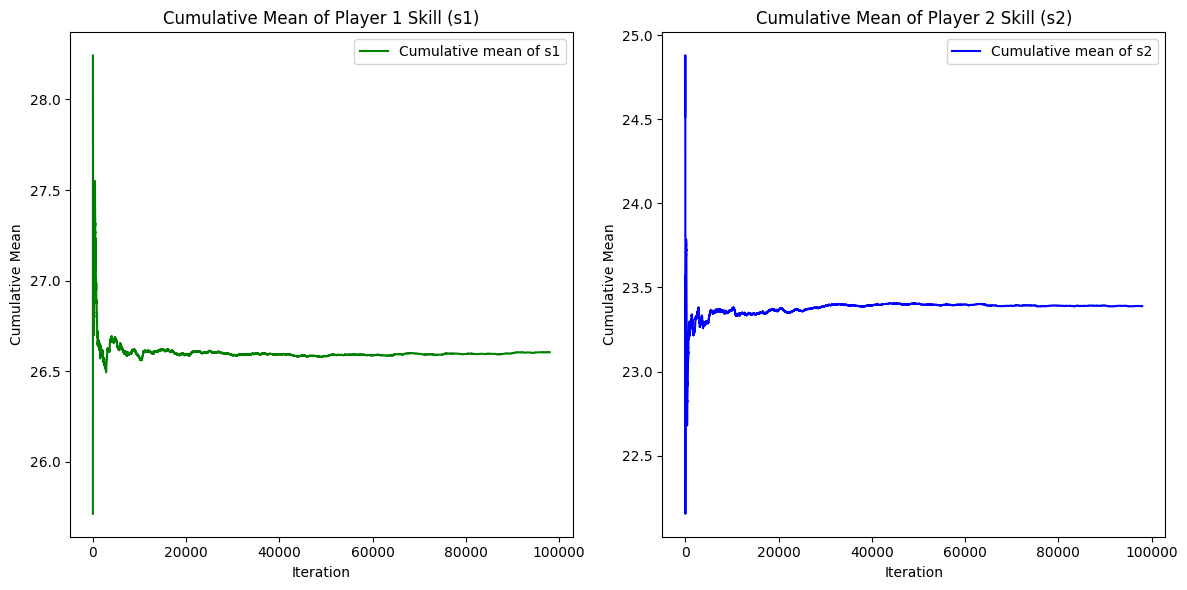

In [43]:
# Calculating cumulative means
s1_cumulative_mean = np.cumsum(s1_samples) / np.arange(1, len(s1_samples) + 1)
s2_cumulative_mean = np.cumsum(s2_samples) / np.arange(1, len(s2_samples) + 1)

# Plotting the cumulative mean for Player 1 Skill (s1) and Player 2 Skill (s2)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(s1_cumulative_mean, label='Cumulative mean of s1', color='g')
plt.title('Cumulative Mean of Player 1 Skill (s1)')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Mean')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(s2_cumulative_mean, label='Cumulative mean of s2', color='b')
plt.title('Cumulative Mean of Player 2 Skill (s2)')
plt.xlabel('Iteration')
plt.ylabel('Cumulative Mean')
plt.legend()

plt.tight_layout()
plt.show()

C:\Users\ondre\AppData\Local\Temp\ipykernel_22852\964178509.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s1_samples, label="Posterior of s1", shade=True)
C:\Users\ondre\AppData\Local\Temp\ipykernel_22852\964178509.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(s2_samples, label="Posterior of s2", shade=True)


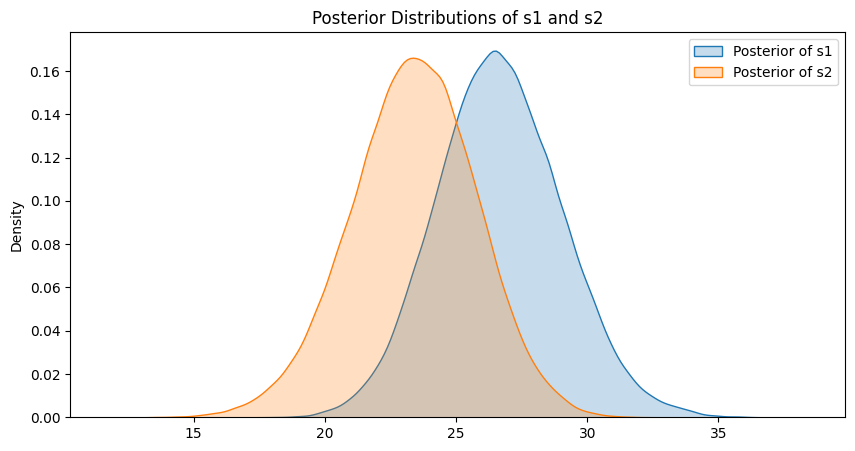

In [15]:
# Plot posterior distributions of s1 and s2
plt.figure(figsize=(10, 5))
sns.kdeplot(s1_samples, label="Posterior of s1", shade=True)
sns.kdeplot(s2_samples, label="Posterior of s2", shade=True)
plt.legend()
plt.title("Posterior Distributions of s1 and s2")
plt.show()


[24.18069292 15.24825279] [[16.74159924 -4.4040546 ]
 [-4.4040546  14.71568751]]
[23.8812265  14.91270088] [[16.55390201 -4.70893213]
 [-4.70893213 14.61410727]]
[24.06833744 15.07951581] [[15.90919168 -3.91536866]
 [-3.91536866 14.30513983]]
[24.00252811 14.99500459] [[15.9146217  -3.93912568]
 [-3.93912568 14.18666381]]
[23.98889505 15.00857904] [[16.36764104 -4.12728402]
 [-4.12728402 14.48781212]]
[23.98428589 14.99637341] [[16.31341811 -4.2104237 ]
 [-4.2104237  14.47705166]]


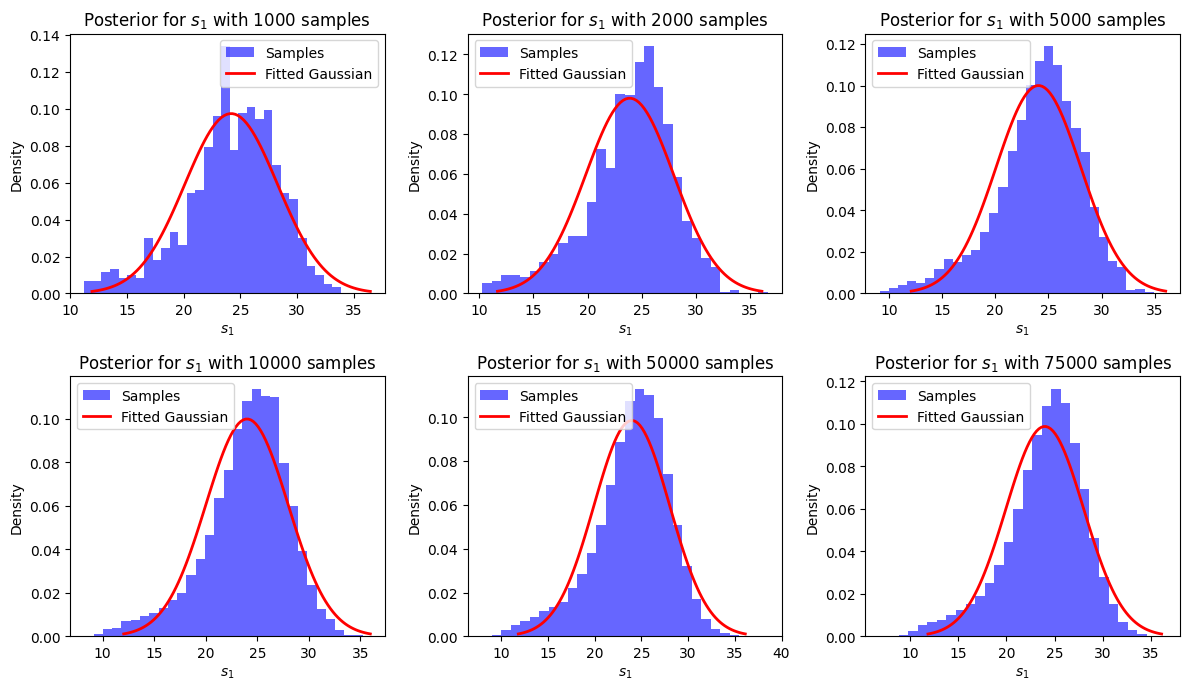

In [77]:
def fit_gaussian(samples):
    mean = np.mean(samples, axis=0)
    covariance = np.cov(samples, rowvar=False)
    return mean, covariance

def compare_samples(sample_sizes, burn_in):
    plt.figure(figsize=(12, 10))
    
    for i, size in enumerate(sample_sizes):
        sample1, sample2 = gibbs_sampling(num_samples=size, burn_in=burn_in, initial_s1=25, initial_s2=25)

        samples = np.array([list(i) for i in zip(sample1, sample2)])

        mean, covariance = fit_gaussian(samples)

        print(mean, covariance)

        plt.subplot(3, 3, i+1)
        plt.hist(samples[:, 0], bins=30, density=True, alpha=0.6, color='b', label='Samples')
        x = np.linspace(mean[0] - 3*np.sqrt(covariance[0, 0]), mean[0] + 3*np.sqrt(covariance[0, 0]), 100)
        plt.plot(x, norm.pdf(x, mean[0], np.sqrt(covariance[0, 0])), 'r', lw=2, label='Fitted Gaussian')
        plt.title(f'Posterior for $s_1$ with {size} samples')
        plt.xlabel('$s_1$')
        plt.ylabel('Density')
        plt.legend()

    plt.tight_layout()
    plt.show()

# Define sample sizes and burn-in
sample_sizes = [1000, 2000, 5000, 10000, 50000, 75000]
burn_in = 200  # Reasonable choice, can be adjusted based on observation

# Compare samples
compare_samples(sample_sizes, burn_in)

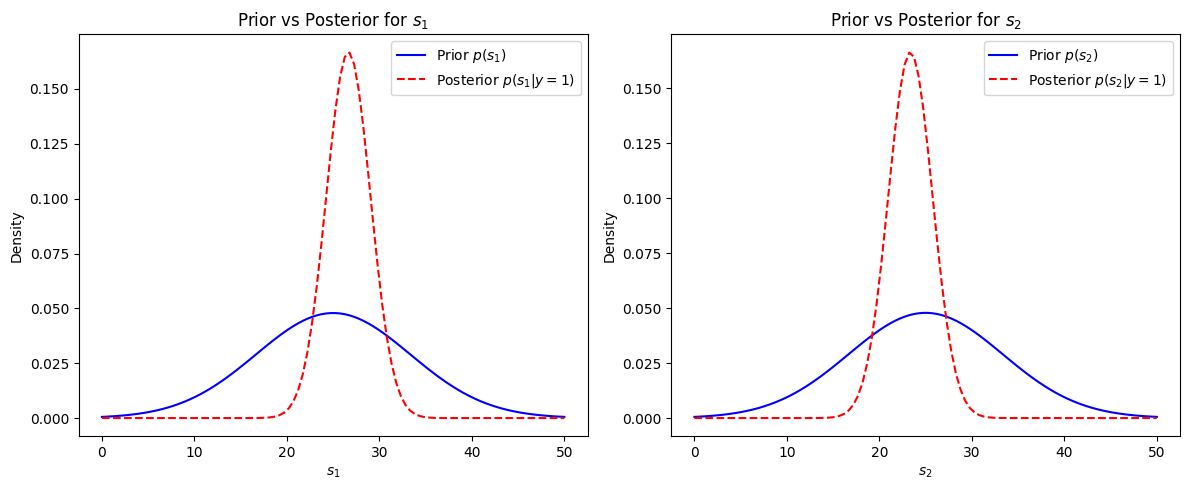

In [16]:
def plot_prior_vs_posterior(prior_mean, prior_std, posterior_mean, posterior_std):
    x = np.linspace(0, 50, 100)

    # Prior for s1 and s2
    prior_s1 = norm.pdf(x, prior_mean, prior_std)
    prior_s2 = norm.pdf(x, prior_mean, prior_std)

    plt.figure(figsize=(12, 5))

    # Prior vs Posterior for s1
    plt.subplot(1, 2, 1)
    plt.plot(x, prior_s1, 'b-', label='Prior $p(s_1)$')
    plt.plot(x, norm.pdf(x, posterior_mean[0], posterior_std[0]), 'r--', label='Posterior $p(s_1 | y=1)$')
    plt.title('Prior vs Posterior for $s_1$')
    plt.xlabel('$s_1$')
    plt.ylabel('Density')
    plt.legend()

    # Prior vs Posterior for s2
    plt.subplot(1, 2, 2)
    plt.plot(x, prior_s2, 'b-', label='Prior $p(s_2)$')
    plt.plot(x, norm.pdf(x, posterior_mean[1], posterior_std[1]), 'r--', label='Posterior $p(s_2 | y=1)$')
    plt.title('Prior vs Posterior for $s_2$')
    plt.xlabel('$s_2$')
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Define prior mean and standard deviation
posterior_mean = [np.mean(s1_samples), np.mean(s2_samples)]
posterior_std = [np.std(s1_samples), np.std(s2_samples)]

# Compare prior and posterior
plot_prior_vs_posterior(25, 25/3, posterior_mean=posterior_mean, posterior_std=posterior_std)


## Q5

#### Using rejection sampling

In [ ]:
# Sample data for Serie A matches (replace this with the full dataset)
data = pd.read_csv('SerieA.csv')

# Initialize parameters
initial_mean_skill = 25.0  # Initial mean skill for each team
initial_variance = 25.0 / 3  # Initial variance for each team's skill
sigma_t = 1.0  # Standard deviation for match outcomes

# Initialize skills for each team
teams = set(data['team1']).union(set(data['team2']))
skills = {team: [initial_mean_skill, np.sqrt(initial_variance)] for team in teams}

# Function to sample t given s1 and s2
def sample_t(s1, s2, sigma_t):
    return np.random.normal(s1 - s2, sigma_t)

# Function to sample s = [s1, s2] given t using joint normal
def sample_s_given_t(t, mu_1, mu_2, sigma_1, sigma_2, sigma_t):
    variance_s1 = sigma_1**2
    variance_s2 = sigma_2**2

    # Precompute components for efficiency
    A = np.array([[1, -1]])
    Sigma_s_inv = np.array([[1 / variance_s1, 0], [0, 1 / variance_s2]])
    
    inv_sigma_t = 1 / (sigma_t**2)
    cov_s_given_t = np.linalg.inv(A.T @ A * inv_sigma_t + Sigma_s_inv)
    
    # Ensure the mean vector is one-dimensional
    mean_s_given_t = cov_s_given_t @ (A.T * inv_sigma_t * t + Sigma_s_inv @ np.array([[mu_1], [mu_2]]))

    # Convert the mean vector to a 1D array
    mean_s_given_t = mean_s_given_t.flatten()

    # Draw a sample from the conditional distribution
    return np.random.multivariate_normal(mean_s_given_t, cov_s_given_t)

# Gibbs Sampling with Burn-in
def gibbs_sampling(num_samples, burn_in, initial_s1, initial_s2):
    s1_samples = np.zeros(num_samples)
    s2_samples = np.zeros(num_samples)

    # Initialize first samples
    s1_samples[0] = initial_s1[0]
    s2_samples[0] = initial_s2[0]

    for i in range(1, num_samples):
        s1_current = s1_samples[i - 1]
        s2_current = s2_samples[i - 1]
        
        t_new = sample_t(s1_current, s2_current, sigma_t)
        
        # Sample s given t
        while True:
            s_new = sample_s_given_t(t_new, initial_s1[0], initial_s2[0], initial_s1[1], initial_s2[1], sigma_t)

            if s_new[0] > s_new[1]:  # Ensure s1 > s2
                s1_samples[i] = s_new[0]
                s2_samples[i] = s_new[1]
                break

    return s1_samples[burn_in:], s2_samples[burn_in:]

# Parameters for Gibbs sampling
num_samples = 10000
burn_in = 500  # Number of samples to discard


for idx, row in data.iterrows():
    team1, team2 = row['team1'], row['team2']
    score1, score2 = row['score1'], row['score2']

    # Skip draws
    if score1 == score2:
        continue

    # Get initial skills for teams
    s1_initial = skills[team1]
    s2_initial = skills[team2]

    print(f"Initial skills for {team1}: Mean = {s1_initial[0]}, Variance = {s1_initial[1]**2}")
    print(f"Initial skills for {team2}: Mean = {s2_initial[0]}, Variance = {s2_initial[1]**2}")

    # Perform Gibbs sampling
    if score1 > score2:
        s1_samples, s2_samples = gibbs_sampling(num_samples, burn_in, s1_initial, s2_initial)
    else:
        s2_samples, s1_samples = gibbs_sampling(num_samples, burn_in, s2_initial, s1_initial)

    skills[team1] = [np.mean(s1_samples), np.std(s1_samples)]
    skills[team2] = [np.mean(s2_samples), np.std(s2_samples)]

    print(f"Updated skills for {team1}: Mean = {skills[team1][0]}, Variance = {skills[team1][1]**2}")
    print(f"Updated skills for {team2}: Mean = {skills[team2][0]}, Variance = {skills[team2][1]**2}")
    print()


#### Using truncated normal

In [18]:
# Sample data for Serie A matches (replace this with the full dataset)
data = pd.read_csv('SerieA.csv')

# Initialize parameters
initial_mean_skill = 25.0  # Initial mean skill for each team
initial_variance = 25.0 / 3  # Initial variance for each team's skill
sigma_t = 1.0  # Standard deviation for match outcomes

# Initialize skills for each team
teams = set(data['team1']).union(set(data['team2']))
skills = {team: [initial_mean_skill, np.sqrt(initial_variance)] for team in teams}

# Function to sample t given s1 and s2
def sample_t(s1, s2, sigma_t):
    return np.random.normal(s1 - s2, sigma_t)

# Truncated Gaussian helper function for sampling with truncation
def truncated_gaussian(mean, std, lower_bound, upper_bound):
    a, b = (lower_bound - mean) / std, (upper_bound - mean) / std
    return truncnorm.rvs(a, b, loc=mean, scale=std)

# Function to sample s = [s1, s2] given t using truncated normal
def sample_s_given_t(t, mu_1, mu_2, sigma_1, sigma_2, sigma_t):
    variance_s1 = sigma_1**2
    variance_s2 = sigma_2**2

    # Precompute components for efficiency
    A = np.array([[1, -1]])
    Sigma_s_inv = np.array([[1 / variance_s1, 0], [0, 1 / variance_s2]])
    
    inv_sigma_t = 1 / (sigma_t**2)
    cov_s_given_t = np.linalg.inv(A.T @ A * inv_sigma_t + Sigma_s_inv)
    
    # Ensure the mean vector is one-dimensional
    mean_s_given_t = cov_s_given_t @ (A.T * inv_sigma_t * t + Sigma_s_inv @ np.array([[mu_1], [mu_2]]))
    mean_s_given_t = mean_s_given_t.flatten()

    # Draw samples from the truncated normal distribution for s1 > s2
    s_diff_mean = mean_s_given_t[0] - mean_s_given_t[1]
    s_diff_std = np.sqrt(cov_s_given_t[0, 0] + cov_s_given_t[1, 1] - 2 * cov_s_given_t[0, 1])
    
    # Truncate so that s1 - s2 > 0
    s_diff = truncated_gaussian(s_diff_mean, s_diff_std, 0, np.inf)
    
    # Sample s2 and compute s1 = s2 + s_diff
    s2 = np.random.normal(mean_s_given_t[1], np.sqrt(cov_s_given_t[1, 1]))
    s1 = s2 + s_diff

    return [s1, s2]

# Gibbs Sampling with Burn-in
def gibbs_sampling(num_samples, burn_in, initial_s1, initial_s2):
    s1_samples = np.zeros(num_samples)
    s2_samples = np.zeros(num_samples)

    # Initialize first samples
    s1_samples[0] = initial_s1[0]
    s2_samples[0] = initial_s2[0]

    for i in range(1, num_samples):
        s1_current = s1_samples[i - 1]
        s2_current = s2_samples[i - 1]
        
        t_new = sample_t(s1_current, s2_current, sigma_t)
        
        # Sample s given t using truncated Gaussian
        s_new = sample_s_given_t(t_new, initial_s1[0], initial_s2[0], initial_s1[1], initial_s2[1], sigma_t)
        s1_samples[i] = s_new[0]
        s2_samples[i] = s_new[1]

    return s1_samples[burn_in:], s2_samples[burn_in:]

# Parameters for Gibbs sampling
num_samples = 10000
burn_in = 500  # Number of samples to discard


for idx, row in data.iterrows():
    team1, team2 = row['team1'], row['team2']
    score1, score2 = row['score1'], row['score2']

    # Skip draws
    if score1 == score2:
        continue

    # Get initial skills for teams
    s1_initial = skills[team1]
    s2_initial = skills[team2]

    # Perform Gibbs sampling
    if score1 > score2:
        s1_samples, s2_samples = gibbs_sampling(num_samples, burn_in, s1_initial, s2_initial)
    else:
        s2_samples, s1_samples = gibbs_sampling(num_samples, burn_in, s2_initial, s1_initial)

    skills[team1] = [np.mean(s1_samples), np.std(s1_samples)]
    skills[team2] = [np.mean(s2_samples), np.std(s2_samples)]



In [19]:
skills

{'Lazio': [28.003278885591126, 0.9263080565913896],
 'Napoli': [29.260979358031168, 1.1372555275773106],
 'Spal': [27.80677786917337, 0.9836089790372062],
 'Frosinone': [26.428842993586485, 0.8162062897206757],
 'Atalanta': [30.184032904989913, 1.5993381214625662],
 'Sassuolo': [26.47164461293534, 0.9727124559263379],
 'Genoa': [26.100474973495352, 0.9697978209958522],
 'Milan': [29.66688981120003, 1.3083493441146914],
 'Parma': [26.33136753963459, 0.9331633461796862],
 'Roma': [30.056453219368134, 1.448033050700801],
 'Juventus': [26.93581733177996, 1.0208243632225593],
 'Sampdoria': [27.675407353403585, 1.042959534839679],
 'Fiorentina': [25.27430266851325, 0.7729396923318114],
 'Udinese': [29.21780100720533, 1.1655982773312576],
 'Cagliari': [27.31777420674169, 0.8747797169020471],
 'Torino': [29.234158558963717, 1.1007743538348262],
 'Inter': [29.781173193627072, 1.1634059594457373],
 'Empoli': [28.65654482087129, 1.0969016318400113],
 'Bologna': [30.115554950270717, 1.169523406860